In [ ]:
#csv file part of the project
import csv 
import pandas as pd 

#get the dataframe setup 
races_df = pd.read_csv('races.csv')

#set the index to the year 
races_df_date = races_df.set_index('year').copy()

# only get the italian GPs and sort 
italy_df = races_df_date[races_df_date['name']=='Italian Grand Prix']

#clean up the dataframe 
italy_df1 = italy_df.drop(columns =['time', 'url']).sort_index()


# dict_1={}
# # get a dictionary of the years and rounds 
# dict_1[italy_df1['year']]=italy_df1['round']
# print(dict_1)


italy_df1.to_csv(r'Italy.csv')
italy_df1



: 

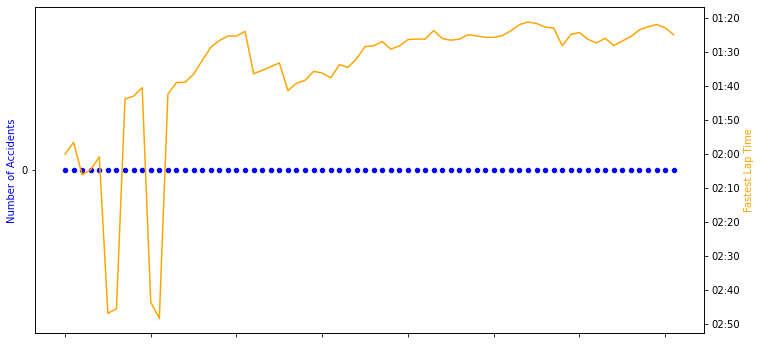

In [159]:
#full copy of py file in Tyler_Alcorn_Final.py
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys 
import requests
from bs4 import BeautifulSoup
import matplotlib.dates
from datetime import datetime 
from matplotlib.dates import DateFormatter

#get the dataframe setup 
races_df = pd.read_csv('races.csv')

#set the index to the year 
races_df_date = races_df.set_index('year').copy()

# only get the italian GPs and sort 
italy_df = races_df_date[races_df_date['name']=='Italian Grand Prix']

#clean up the dataframe 
italy_df1 = italy_df.drop(columns =['time', 'url']).sort_index()

# API with iteration using years_and_rounds_order dict

#dict creation
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#sort the keys 
years_and_rounds_order={}
for key in sorted(years_and_rounds):
    years_and_rounds_order[key]=years_and_rounds[key]
#end of dict creation 

#API request for number of accidents 
Accident_count=[]
for key, val in years_and_rounds_order.items():
    url = "http://ergast.com/api/f1/"+ key + "/" + val +"/status"

    payload={}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)
    lines= response.text.split('\n')
    if response.text.find("Accident") == -1:
        Accident_count.append('0')
    else: 
        for line in lines:
            if "Accident" in line:
                parts = line.split('"')
                Accident_count.append(parts[3])

#list creation 
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#make a list of the years
years_list=[]
for key in sorted(years_and_rounds):
    years_list.append(key)
#end of list creation

#fastest lap list creation from web scraping 
Italy_fastlap=[]
for year in years_list:
    website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
    content = requests.get(website)
    soup = BeautifulSoup(content.content, 'html.parser')
    table= soup.find('table', class_='resultsarchive-table')
    columns = table.find('thead').find_all('th')
    column_names= [c.string for c in columns]
    table_rows = table.find('tbody').find_all('tr')

    table_list = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [str(tr.get_text()).strip() for tr in td]
        table_list.append(row)
    # times_df= pd.DataFrame(l, columns=column_names)
    # times_df
    
    for lst in table_list:
        if 'Italy' in lst:
            Italy_fastlap.append(lst[4])      
#output is each year write code to only take the 'Italy' row lap time     

#add the accident count list and fastest lap list to the italy_df1
italy_df1['Accident_Number']= Accident_count
italy_df1['Fastest_Lap']= Italy_fastlap
italy_df1['Fastest_Lap']= pd.to_datetime(italy_df1['Fastest_Lap'], format= '%M:%S.%f')
italy_df1.reset_index(inplace=True)
#create a csv file of the dataframe 
italy_df1.to_csv('Italy_dataframe.csv')

#create a visualization and statist test for speeds versus accident count 
#make the figure

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize']=(12,6)

#make the times useable for the graph to plot 

x=italy_df1['year'].to_list()
y= italy_df1['Accident_Number'].tolist()
y2= italy_df1['Fastest_Lap'].tolist()

#first plot

accidents_plots= ax1.scatter(x, y, label= 'Number of Accidents', color='blue', s=20 )
ax1.set_ylabel('Number of Accidents', color= 'blue')
#x axis fix 

every_nth = 10
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
     if n % every_nth != 0:
         label.set_visible(False) 

#making second y axis

ax2= ax1.twinx()

#second plot

times_plot= ax2.plot(x, y2, color= 'orange', label='Fastest Lap')
ax2.set_ylabel('Fastest Lap Time', color='orange' )

#y axis fix for time

ax2.yaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.invert_yaxis()
plt.savefig('Italy_graph.pdf')

In [99]:
# make dict of year and round for Italian GP key:year values:round
import sys 
import csv

years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#sort the keys 
years_and_rounds_order={}
for key in sorted(years_and_rounds):
    years_and_rounds_order[key]=years_and_rounds[key]

#make a list of the years
years_list=[]
for key in sorted(years_and_rounds):
    years_list.append(key)

#final dict with order keys is years_and_rounds_order
#final list of all years is years_list

print(years_and_rounds_order)
print(years_list)

{'1950': '7', '1951': '7', '1952': '8', '1953': '9', '1954': '8', '1955': '7', '1956': '8', '1957': '8', '1958': '10', '1959': '8', '1960': '9', '1961': '7', '1962': '7', '1963': '7', '1964': '8', '1965': '8', '1966': '7', '1967': '9', '1968': '9', '1969': '8', '1970': '10', '1971': '9', '1972': '10', '1973': '13', '1974': '13', '1975': '13', '1976': '13', '1977': '14', '1978': '14', '1979': '13', '1980': '12', '1981': '13', '1982': '15', '1983': '13', '1984': '14', '1985': '12', '1986': '13', '1987': '11', '1988': '12', '1989': '12', '1990': '12', '1991': '12', '1992': '13', '1993': '13', '1994': '12', '1995': '12', '1996': '14', '1997': '13', '1998': '14', '1999': '13', '2000': '14', '2001': '15', '2002': '15', '2003': '14', '2004': '15', '2005': '15', '2006': '15', '2007': '13', '2008': '14', '2009': '13', '2010': '14', '2011': '13', '2012': '13', '2013': '12', '2014': '13', '2015': '12', '2016': '14', '2017': '13', '2018': '14', '2019': '14', '2020': '8', '2021': '14'}
['1950', '19

In [86]:
#API for status of each race/ test of output 

import xml.etree.ElementTree as ET
import requests
import pyergast

year = '1952'
round = '8'
Accident_count=[]
url = "https://ergast.com/api/f1/"+ year + "/" + round +"/status"

payload={}
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}
#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}


#response = requests.request("GET", url, headers=headers, data=payload)
response = requests.get(url, headers=headers)

lines= response.text.split('\n')
if response.text.find("Accident") == -1:
    Accident_count.append('0')
else: 
    for line in lines:
        if "Accident" in line:
            parts = line.split('"')
            Accident_count.append(parts[3])
       

print(response)


print(Accident_count)


#figure out how to make a useable list/ dict

ModuleNotFoundError: No module named 'pyergast'

In [80]:
# API with iteration using years_and_rounds_order dict
import sys 
import csv
import requests

#dict creation
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#sort the keys 
years_and_rounds_order={}
for key in sorted(years_and_rounds):
    years_and_rounds_order[key]=years_and_rounds[key]
#end of dict creation 

print(years_and_rounds_order)

Accident_count=[]
for key, val in years_and_rounds_order.items():
    url = "https://ergast.com/api/f1/"+ key + "/" + val +"/status"

    payload={}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)
    lines= response.text.split('\n')
    if response.text.find("Accident") == -1:
        Accident_count.append('0')
    else: 
        for line in lines:
            if "Accident" in line:
                parts = line.split('"')
                Accident_count.append(parts[3])
       
        
            
print(Accident_count)
len(Accident_count)
#figure out how to make it a useable list or dict

{'1950': '7', '1951': '7', '1952': '8', '1953': '9', '1954': '8', '1955': '7', '1956': '8', '1957': '8', '1958': '10', '1959': '8', '1960': '9', '1961': '7', '1962': '7', '1963': '7', '1964': '8', '1965': '8', '1966': '7', '1967': '9', '1968': '9', '1969': '8', '1970': '10', '1971': '9', '1972': '10', '1973': '13', '1974': '13', '1975': '13', '1976': '13', '1977': '14', '1978': '14', '1979': '13', '1980': '12', '1981': '13', '1982': '15', '1983': '13', '1984': '14', '1985': '12', '1986': '13', '1987': '11', '1988': '12', '1989': '12', '1990': '12', '1991': '12', '1992': '13', '1993': '13', '1994': '12', '1995': '12', '1996': '14', '1997': '13', '1998': '14', '1999': '13', '2000': '14', '2001': '15', '2002': '15', '2003': '14', '2004': '15', '2005': '15', '2006': '15', '2007': '13', '2008': '14', '2009': '13', '2010': '14', '2011': '13', '2012': '13', '2013': '12', '2014': '13', '2015': '12', '2016': '14', '2017': '13', '2018': '14', '2019': '14', '2020': '8', '2021': '14'}


KeyboardInterrupt: 

In [60]:
#scarpe the fastest laps from the formula 1 website, create list to add to the database 
#test with hard coded list or single value
import requests
import json 
from bs4 import BeautifulSoup
import re
import pandas as pd

year = '2014'
website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
content = requests.get(website)
soup = BeautifulSoup(content.content, 'html.parser')

table= soup.find('table', class_='resultsarchive-table')
columns = table.find('thead').find_all('th')
column_names= [c.string for c in columns]
table_rows = table.find('tbody').find_all('tr')

table_list = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [str(tr.get_text()).strip() for tr in td]
    table_list.append(row)
# times_df= pd.DataFrame(l, columns=column_names)
# times_df
Italy_fastlap=[]
for lst in table_list:
    if 'Italy' in lst:
        Italy_fastlap.append(lst[4])
print(Italy_fastlap)


['1:28.004']


In [54]:
#scarpe the fastest laps from the formula 1 website, create list to add to the database 
#iterate over the years list 

#list creation 
import sys 
import csv
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#make a list of the years
years_list=[]
for key in sorted(years_and_rounds):
    years_list.append(key)
#end of list creation



import requests
 
from bs4 import BeautifulSoup
Italy_fastlap=[]
for year in years_list:
    website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
    content = requests.get(website)
    soup = BeautifulSoup(content.content, 'html.parser')
    table= soup.find('table', class_='resultsarchive-table')
    columns = table.find('thead').find_all('th')
    column_names= [c.string for c in columns]
    table_rows = table.find('tbody').find_all('tr')

    table_list = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [str(tr.get_text()).strip() for tr in td]
        table_list.append(row)
    # times_df= pd.DataFrame(l, columns=column_names)
    # times_df
    
    for lst in table_list:
        if 'Italy' in lst:
            Italy_fastlap.append(lst[4])
print(Italy_fastlap)
len(Italy_fastlap)
#output is each year write code to only take the 'Italy' row lap time 
#make a list or dict of the fastest laps for each year, probably list to make into a series or as one column 


['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']


72

In [77]:
#collection of all the random code above, make a new cell to get eveything working together 

import requests
year = '2017'
round = '13'
url = "http://ergast.com/api/f1/"+ year + "/" + round +"/status"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

#get a list/dict to add to the italy dataframe, should a count of the accidents per race

# add the dict/list to the datebase as an additonal column 


#scarpe the fastest laps from the formula 1 website, create list to add to the database 
import requests
import json 
from bs4 import BeautifulSoup
def scrape():
    year = '2014'
    website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
    content = requests.get(website)
    soup = BeautifulSoup(content.content, 'html.parser')
    print(soup)
print(scrape())

# add fastest laps to the datbase as a column 

# clean up any issues






#iterate through the dictionary to get the data from the API 
import requests

url = "http://ergast.com/api/f1/"+ year + "/" + round +"/status"

payload={} 
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

#get a list/dict to add to the italy dataframe, should a count of the accidents per race

# add the dict/list to the datebase as an additonal column 


#scarpe the fastest laps from the formula 1 website, create list to add to the database 
import requests
import json 
from bs4 import BeautifulSoup
def scrape():
    years = ['2014']
    for year in years:
        website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
        content = requests.get(website)
        soup = BeautifulSoup(content.content, 'html.parser')
        # append to a list / dict
print(scrape())

# add fastest laps to the datbase as a column 

# clean up any issues

<?xml version="1.0" encoding="utf-8"?>
<?xml-stylesheet type="text/xsl" href="/schemas/mrd-1.4.xsl"?>
<MRData xmlns="http://ergast.com/mrd/1.4" series="f1" url="http://ergast.com/api/f1/2017/13/status" limit="30" offset="0" total="5">
	<StatusTable season="2017" round="13">
		<Status statusId="1" count="9">Finished</Status>
		<Status statusId="5" count="2">Engine</Status>
		<Status statusId="6" count="2">Gearbox</Status>
		<Status statusId="11" count="6">+1 Lap</Status>
		<Status statusId="12" count="1">+2 Laps</Status>
	</StatusTable>
</MRData>


<!DOCTYPE html>

<!--[if IE 8 ]> <html class="nojs lt-ie10 lte-ie9 ie8" lang="en"> <![endif]-->
<!--[if IE 9 ]> <html class="nojs lt-ie10 ie9" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js editmode-false" itemscope="" itemtype="http://schema.org/Website" lang="en">
<!--<![endif]-->
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta content="IE=edge" http-equiv="X

In [ ]:
#main function explaination and wahtnot 


import sys
# import all the other libraries you need
# make sure to explain in the readme any special libraries the TAs might need

def default_function():
    #default mode
    #add the functions/code you need to scrape all your data
    #print all the data you scrape/request but and if it's huge, show the dimensions and a sample






    
    pass

def scrape_function():
    #scrape mode
    #add the functions/code you need to scrape SOME (5 rows per dataset) of your data and print
    #this might be very similar to the default mode
    #you can hard code inputs if need be
    pass

def static_function(path_to_static_data):
    #static mode
    #add the functions/code you need to open and print the static copies of your data
    #you can use the path provided in the command line argument to open the data
    pass

if __name__ == '__main__': #for your purpose, you can think of this line as the saying "run this chunk of code first"
    if len(sys.argv) == 1: # this is basically if you don't pass any additional arguments to the command line
        #default mode
        #print eveything or the dimensions and a sample 
        default_function()
        
    elif sys.argv[1] == '--scrape': # if you pass '--scrape' to the command line
        #scrape mode
        #print a sample of the data you retrieve from your sources
        scrape_function()
        
    elif sys.argv[1] == '--static': # if you pass '--static' to the command line
        #static mode
        #print a sample of the static datasets you have built from your scraping
        path_to_static_data = sys.argv[2]
        static_function(path_to_static_data)

KeyError: 'year'

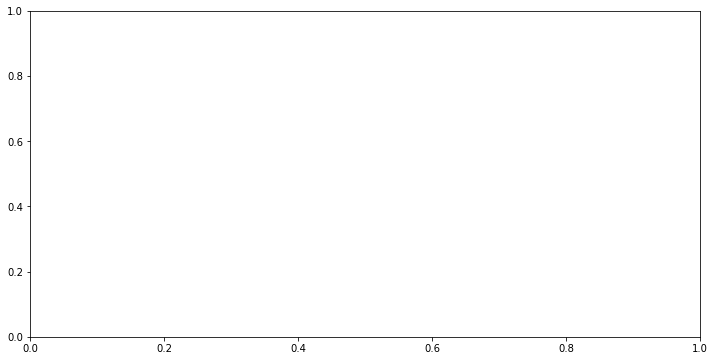

In [142]:
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys 
import requests
from bs4 import BeautifulSoup
import matplotlib.dates
from datetime import datetime 
from matplotlib.dates import DateFormatter

#get the dataframe setup 
races_df = pd.read_csv('races.csv')

#set the index to the year 
races_df_date = races_df.set_index('year').copy()

# only get the italian GPs and sort 
italy_df = races_df_date[races_df_date['name']=='Italian Grand Prix']

#clean up the dataframe 
italy_df1 = italy_df.drop(columns =['time', 'url']).sort_index()

# API with iteration using years_and_rounds_order dict

#dict creation
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#sort the keys 
years_and_rounds_order={}
for key in sorted(years_and_rounds):
    years_and_rounds_order[key]=years_and_rounds[key]
#end of dict creation 

#API request for number of accidents 
Accident_count=[]
for key, val in years_and_rounds_order.items():
    url = "http://ergast.com/api/f1/"+ key + "/" + val +"/status"

    payload={}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)
    lines= response.text.split('\n')
    if response.text.find("Accident") == -1:
        Accident_count.append('0')
    else: 
        for line in lines:
            if "Accident" in line:
                parts = line.split('"')
                Accident_count.append(parts[3])

#list creation 
years_and_rounds={}
with open('races.csv', 'r') as csvfile:
    lines= csv.reader(csvfile, delimiter=',')
    for row in lines:
        if row[4] == "Italian Grand Prix":
            years_and_rounds[row[1]]=row[2]
        else:
            continue
#make a list of the years
years_list=[]
for key in sorted(years_and_rounds):
    years_list.append(key)
#end of list creation

#fastest lap list creation from web scraping 
Italy_fastlap=[]
for year in years_list:
    website = 'https://www.formula1.com/en/results.html/' +year+'/fastest-laps.html'
    content = requests.get(website)
    soup = BeautifulSoup(content.content, 'html.parser')
    table= soup.find('table', class_='resultsarchive-table')
    columns = table.find('thead').find_all('th')
    column_names= [c.string for c in columns]
    table_rows = table.find('tbody').find_all('tr')

    table_list = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [str(tr.get_text()).strip() for tr in td]
        table_list.append(row)
    # times_df= pd.DataFrame(l, columns=column_names)
    # times_df
    
    for lst in table_list:
        if 'Italy' in lst:
            Italy_fastlap.append(lst[4])      
#output is each year write code to only take the 'Italy' row lap time     

#add the accident count list and fastest lap list to the italy_df1
italy_df1['Accident_Number']= Accident_count
italy_df1['Fastest_Lap']= Italy_fastlap
italy_df1['Fastest_Lap']= pd.to_datetime(italy_df1['Fastest_Lap'], format= '%M:%S.%f')


#create a visualization and statist test for speeds versus accident count 
#make the figure
fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize']=(12,6)
#make the times useable for the graph to plot 
x=italy_df1['year'].to_list()
y= italy_df1['Fastest_Lap'].tolist()
y2= italy_df1['Accident_Number'].tolist()
#first plot
accidents_plots= ax1.scatter(x, y2, label= 'Number of Accidents', color='blue' )
ax1.set_ylabel('Number of Accidents', color= 'blue')
#x axis fix 
every_nth = 10
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False) 

#making second y axis
ax2= ax1.twinx()

#second plot
times_plot= ax2.plot(x, y, color= 'orange', label='Fastest Lap')
ax2.set_ylabel('Fastest Lap Time', color='orange' )
#y axis fix for time
ax.yaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.invert_yaxis()
plt.savefig('Italy_graph.pdf')

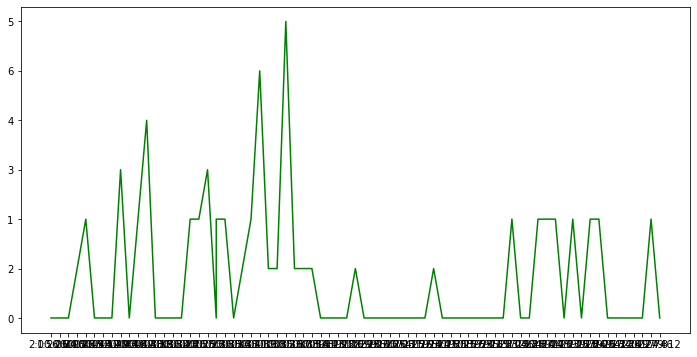

In [139]:
times= ['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']
accidents = ['0', '0', '0', '2', '1', '0', '0', '0', '3', '0', '1', '4', '0', '0', '0', '0', '1', '1', '3', '0', '1', '1', '0', '2', '1', '6', '2', '2', '5', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0']
plt.plot(times, accidents, color= 'green')

<ipython-input-66-b6d719eaa7a1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'][n]=df['times'][n].time()
<ipython-input-66-b6d719eaa7a1>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


0           00:02:00
1    00:01:56.500000
2    00:02:06.100000
3    00:02:04.500000
4    00:02:00.800000
Name: times, dtype: object


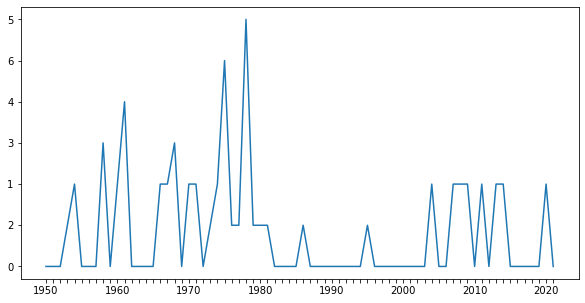

0            00:02:00
1     00:01:56.500000
2     00:02:06.100000
3     00:02:04.500000
4     00:02:00.800000
           ...       
67    00:01:23.361000
68    00:01:22.497000
69    00:01:21.779000
70    00:01:22.746000
71    00:01:24.812000
Name: times, Length: 72, dtype: object


In [66]:
#times and accidents graph draft
times= ['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']
accidents = ['0', '0', '0', '2', '1', '0', '0', '0', '3', '0', '1', '4', '0', '0', '0', '0', '1', '1', '3', '0', '1', '1', '0', '2', '1', '6', '2', '2', '5', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0']
years = ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

df = pd.DataFrame(list(zip(years, times, accidents)),
               columns =['year', 'times', 'accidents'])
              


df['times']= pd.to_datetime(df['times'], format= '%M:%S.%f')
# datetime.strptime(df['times'][0], '%M:%S.%f')

#making a just time df column 
# for n in range(len(df['times'])):
#     df['times'][n]=df['times'][n].time()
# print(df['times'].head())



# df['times'] = df['times'].dt.time
#df['times']= pd.to_datetime(df['times'], format= '%M:%S.%f')

#plt.gca().invert_yaxis()
#plt.plot(df.year, df.times)

#plt.xscale
# x_ticks =np.arange(1950, 2021, 10)
# plt.xticks(x_ticks)
# plt.xlim(1950, 2021)
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=10)


#
plt.figure(figsize=(10,5))
plt.plot(df.year, accidents)
ax = plt.axes()
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()
print(df['times'])

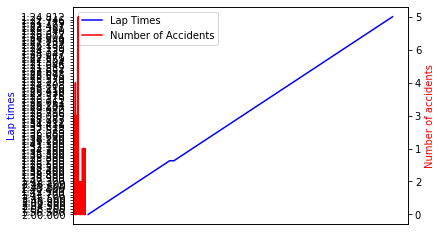

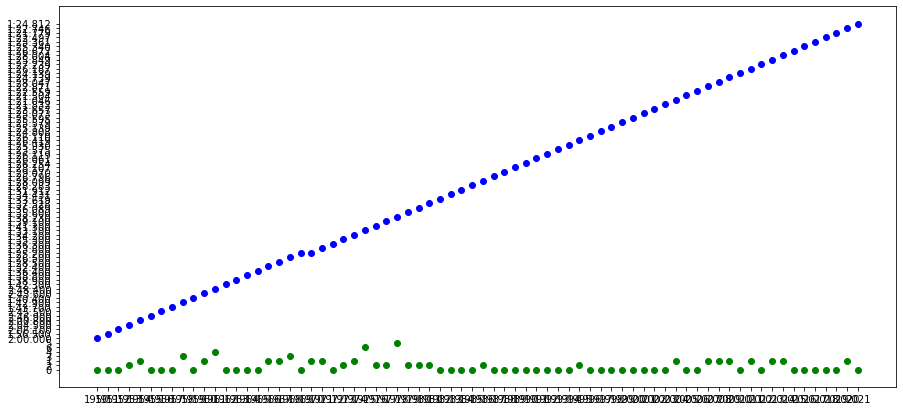

In [45]:
#dual axis graph 
fig, ax1 = plt.subplots()
line1 =ax1.plot(years, times, color='blue', label='Lap Times')
ax1.set_ylabel('Lap times', color='blue')
ax2 = ax1.twinx()
line2 = ax2.plot(years, accidents, color='red', label='Number of Accidents')
ax2.set_ylabel('Number of accidents', color='red')
x_ticks = np.arange(1950, 2021, 10)
plt.xticks(x_ticks)
lines= line1+ line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)
;
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.scatter(years, accidents, color='green')
ax.scatter(years, times, color='blue')

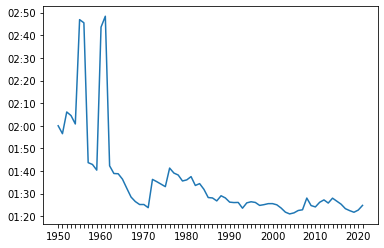

<Figure size 432x288 with 0 Axes>

In [103]:
#times graph 
from matplotlib.dates import DateFormatter

times= ['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']
accidents = ['0', '0', '0', '2', '1', '0', '0', '0', '3', '0', '1', '4', '0', '0', '0', '0', '1', '1', '3', '0', '1', '1', '0', '2', '1', '6', '2', '2', '5', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0']
years = ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

df = pd.DataFrame(list(zip(years, times, accidents)),
               columns =['year', 'times', 'accidents'])
              
#datetime object creation 
df['times']= pd.to_datetime(df['times'], format= '%M:%S.%f')
type(df['times'][0])
y= df['times'].tolist()
ax = plt.subplot()
ax.plot(df.year, y)
ax.yaxis.set_major_formatter(DateFormatter('%M:%S'))
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.show()
plt.savefig('Fastest_Laps.pdf')# didn't show up 

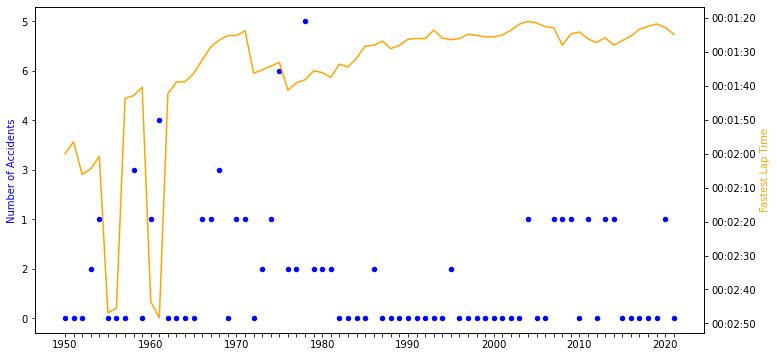

In [158]:
#accident plot that works 
times= ['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']
accidents = ['0', '0', '0', '2', '1', '0', '0', '0', '3', '0', '1', '4', '0', '0', '0', '0', '1', '1', '3', '0', '1', '1', '0', '2', '1', '6', '2', '2', '5', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0']
years = ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


df = pd.DataFrame(list(zip(years, times, accidents)),
               columns =['year', 'times', 'accidents'])
df['times']= pd.to_datetime(df['times'], format= '%M:%S.%f')
y= df['times'].tolist()


#make the figure
fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize']=(12,6)
#first plot
accidents_plots= ax1.scatter(df.year, df.accidents, label= 'Number of Accidents', color='blue', s=20 )
ax1.set_ylabel('Number of Accidents', color= 'blue')
#x axis fix 
every_nth = 10
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False) 

#making second y axis
ax2= ax1.twinx()

#second plot
times_plot= ax2.plot(df.year, y, color= 'orange', label='Fastest Lap')
ax2.set_ylabel('Fastest Lap Time', color='orange' )
#y axis fix for time
ax.yaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.invert_yaxis()
plt.savefig('Italy_graph.pdf')



In [ ]:
times= ['2:00.000', '1:56.500', '2:06.100', '2:04.500', '2:00.800', '2:46.900', '2:45.500', '1:43.700', '1:42.900', '1:40.400', '2:43.600', '2:48.400', '1:42.300', '1:38.900', '1:38.800', '1:36.400', '1:32.400', '1:28.500', '1:26.500', '1:25.200', '1:25.200', '1:23.800', '1:36.300', '1:35.300', '1:34.200', '1:33.100', '1:41.300', '1:39.100', '1:38.230', '1:35.600', '1:36.089', '1:37.528', '1:33.619', '1:34.431', '1:31.912', '1:28.283', '1:28.099', '1:26.796', '1:29.070', '1:28.107', '1:26.254', '1:26.061', '1:26.119', '1:23.575', '1:25.930', '1:26.419', '1:26.110', '1:24.808', '1:25.139', '1:25.579', '1:25.595', '1:25.073', '1:23.657', '1:21.832', '1:21.046', '1:21.504', '1:22.559', '1:22.871', '1:28.047', '1:24.739', '1:24.139', '1:26.187', '1:27.239', '1:25.849', '1:28.004', '1:26.672', '1:25.340', '1:23.361', '1:22.497', '1:21.779', '1:22.746', '1:24.812']
accidents = ['0', '0', '0', '2', '1', '0', '0', '0', '3', '0', '1', '4', '0', '0', '0', '0', '1', '1', '3', '0', '1', '1', '0', '2', '1', '6', '2', '2', '5', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0']
years = ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

df = pd.DataFrame(list(zip(years, times, accidents)),
               columns =['year', 'times', 'accidents'])
               